In [ ]:

# run in analysis-env kernel

import numpy as np
import pandas as pd
import statistics

import pylustrator
# pylustrator.start()

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import os

from datetime import datetime 
current_date = datetime.now().strftime('%y-%m-%d')

from skimage.io import imread

# Intensity profiles from csv files

### dataframe functions

In [ ]:
def resize_columns(df, desired_size):
    resized_data = {}

    for col in df.columns:
        
        original_array = df[col].dropna().values  # Drop NaN for clean interpolation
        indices = np.arange(len(original_array))
        interpolated_function = interp1d(indices, original_array, kind='linear', fill_value="extrapolate")
        new_indices = np.linspace(0, len(original_array) - 1, desired_size)
        resized_array = interpolated_function(new_indices)
        resized_data[col] = resized_array
    
    resized_df = pd.DataFrame(resized_data)

    return resized_df

# Function to apply moving average smoothing
def apply_moving_average(df, window_size):
    smoothed_df = df.copy()
    for column in df.columns:
        smoothed_df[column] = np.convolve(df[column], np.ones(window_size) / window_size, mode='same')
    return smoothed_df

def normalize_columns(df):
    """
    Normalize each column of the DataFrame by dividing each element by the maximum value of the column.
    """
    df_normalized = df.copy()
    for column in df.columns:
        # Normalize by dividing by the max value in the column
        max_value = df[column].max()
        if max_value != 0:  # Avoid division by zero
            df_normalized[column] = df[column] / max_value
        else:
            df_normalized[column] = df[column]  # If max_value is 0, don't change the column
    return df_normalized




### combined plots

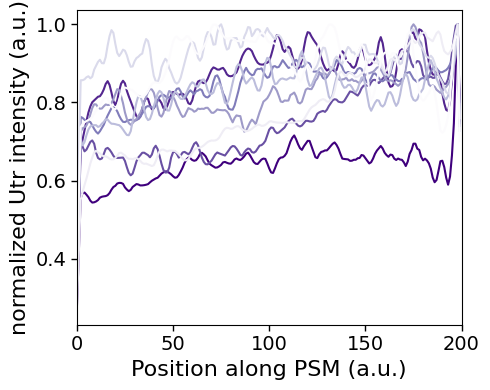

In [ ]:
# utrophin

file_path = "/Users/fnarslan/Documents/results_embryo/2D_intensity_profiles/utrophin_myosin_h2b/Book1.xlsx"  # Replace with your actual file path
df = pd.read_excel(file_path)
df = df.iloc[:, 1::2]  # Select only even-indexed columns (0-based indexing)
df_resized = resize_columns(df,200);
df_smooth = apply_moving_average(df_resized, 4);
df_norm = normalize_columns(df_smooth)
df = df_norm

colormap = plt.cm.Purples
norm = mcolors.Normalize(vmin=0, vmax=len(df.columns) - 1)  # Normalize to the number of columns

fig, ax = plt.subplots(figsize=(5, 4))

# Plot each column with the corresponding color from the Purples colormap
for i, column in enumerate(df.columns):
    # Reverse the colormap by mapping the index in reverse order
    color = colormap(norm(len(df.columns) - i - 1))  # Reversing the color map index
    plt.plot(df[column], color=color)

# Customize plot appearance
ax.tick_params(width=1, length=4, labelsize=14)  # Adjust tick size and style
plt.xlabel('Position along PSM (a.u.)', fontsize=16)  # X-axis label
plt.ylabel('normalized Utr intensity (a.u.)', fontsize=16)  # Y-axis label
plt.xlim([0,200])
plt.xticks(range(0, 201, 50))
plt.tight_layout()

# Save the plot 
directory = os.path.dirname(file_path)  # Get the directory of the CSV file
file_name = os.path.basename(file_path) 
save_path = os.path.join(directory, f'plot_{current_date}_{file_name}.svg')  # Save plot in the same directory

plt.savefig(save_path, bbox_inches='tight', dpi=300)

plt.show()



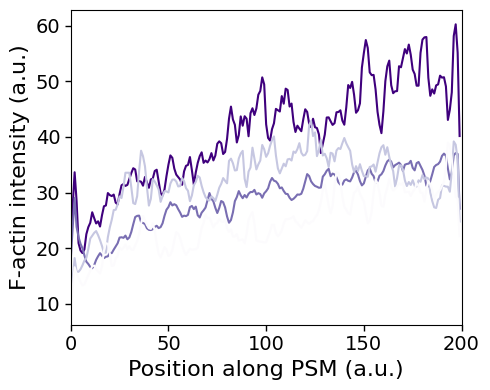

In [ ]:
# phalloidin

file_path = "/Users/fnarslan/Documents/results_embryo/2D_intensity_profiles/phalloidin/line_profiles.xlsx"  # Replace with your actual file path
phal = pd.read_excel(file_path)
phal = phal.iloc[:, 1::2]  # Select only even-indexed columns (0-based indexing)
phal_resized = resize_columns(phal,200);
phal_smooth = apply_moving_average(phal_resized, 4);
# phal_norm = normalize_columns(phal_smooth)
phal = phal_smooth

colormap = plt.cm.Purples
norm = mcolors.Normalize(vmin=0, vmax=len(phal.columns) - 1)  # Normalize to the number of columns

fig, ax = plt.subplots(figsize=(5, 4))

# Plot each column with the corresponding color from the Purples colormap
for i, column in enumerate(phal.columns):
    # Reverse the colormap by mapping the index in reverse order
    color = colormap(norm(len(phal.columns) - i - 1))  # Reversing the color map index
    plt.plot(phal[column], color=color)

# Customize plot appearance
ax.tick_params(width=1, length=4, labelsize=14)  # Adjust tick size and style
plt.xlabel('Position along PSM (a.u.)', fontsize=16)  # X-axis label
plt.ylabel('F-actin intensity (a.u.)', fontsize=16)  # Y-axis label
plt.xlim([0,200])
plt.xticks(range(0, 201, 50))
plt.tight_layout()

# Save the plot 
directory = os.path.dirname(file_path)  # Get the directory of the CSV file
file_name = os.path.basename(file_path) 
save_path = os.path.join(directory, f'plot_{current_date}_{file_name}.svg')  # Save plot in the same directory

plt.savefig(save_path, bbox_inches='tight', dpi=300)

plt.show()



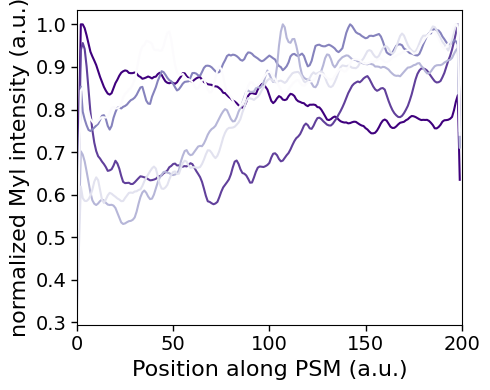

In [6]:
# myosin12.1

file_path = "/Users/fnarslan/Documents/results_embryo/2D_intensity_profiles/utrophin_myosin_h2b/Book1.xlsx"  # Replace with your actual file path
df = pd.read_excel(file_path, sheet_name='myl')
df = df.iloc[:, 1::2]  # Select only even-indexed columns (0-based indexing)
df_resized = resize_columns(df,200);
df_smooth = apply_moving_average(df_resized, 4);
df_norm = normalize_columns(df_smooth)
df = df_norm

colormap = plt.cm.Purples
norm = mcolors.Normalize(vmin=0, vmax=len(df.columns) - 1)  # Normalize to the number of columns

fig, ax = plt.subplots(figsize=(5, 4))

# Plot each column with the corresponding color from the Purples colormap
for i, column in enumerate(df.columns):
    # Reverse the colormap by mapping the index in reverse order
    color = colormap(norm(len(df.columns) - i - 1))  # Reversing the color map index
    plt.plot(df[column], color=color)

# Customize plot appearance
ax.tick_params(width=1, length=4, labelsize=14)  # Adjust tick size and style
plt.xlabel('Position along PSM (a.u.)', fontsize=16)  # X-axis label
plt.ylabel('normalized Myl intensity (a.u.)', fontsize=16)  # Y-axis label
plt.xlim([0,200])
plt.xticks(range(0, 201, 50))
plt.tight_layout()

# Save the plot 
directory = os.path.dirname(file_path)  # Get the directory of the CSV file
file_name = os.path.basename(file_path) 
save_path = os.path.join(directory, f'plot_{current_date}_{file_name}.svg')  # Save plot in the same directory

plt.savefig(save_path, bbox_inches='tight', dpi=300)

plt.show()





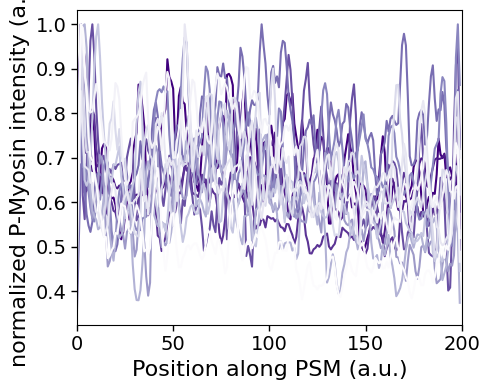

In [9]:
# p-myosin

file_path = "/Users/fnarslan/Documents/results_embryo/2D_intensity_profiles/pmyosin/line_profiles.xlsx"  # Replace with your actual file path
df = pd.read_excel(file_path)
df = df.iloc[:, 1::2]  # Select only even-indexed columns (0-based indexing)
df_resized = resize_columns(df,200);
df_smooth = apply_moving_average(df_resized, 4);
df_norm = normalize_columns(df_smooth)
df = df_norm

colormap = plt.cm.Purples
norm = mcolors.Normalize(vmin=0, vmax=len(df.columns) - 1)  # Normalize to the number of columns

fig, ax = plt.subplots(figsize=(5, 4))

# Plot each column with the corresponding color from the Purples colormap
for i, column in enumerate(df.columns):
    # Reverse the colormap by mapping the index in reverse order
    color = colormap(norm(len(df.columns) - i - 1))  # Reversing the color map index
    plt.plot(df[column], color=color)

# Customize plot appearance
ax.tick_params(width=1, length=4, labelsize=14)  # Adjust tick size and style
plt.xlabel('Position along PSM (a.u.)', fontsize=16)  # X-axis label
plt.ylabel('normalized P-Myosin intensity (a.u.)', fontsize=16)  # Y-axis label
plt.xlim([0,200])
plt.xticks(range(0, 201, 50))
plt.tight_layout()

# Save the plot 
directory = os.path.dirname(file_path)  # Get the directory of the CSV file
file_name = os.path.basename(file_path) 
save_path = os.path.join(directory, f'plot_{current_date}_{file_name}.svg')  # Save plot in the same directory

plt.savefig(save_path, bbox_inches='tight', dpi=300)

plt.show()





### single plots

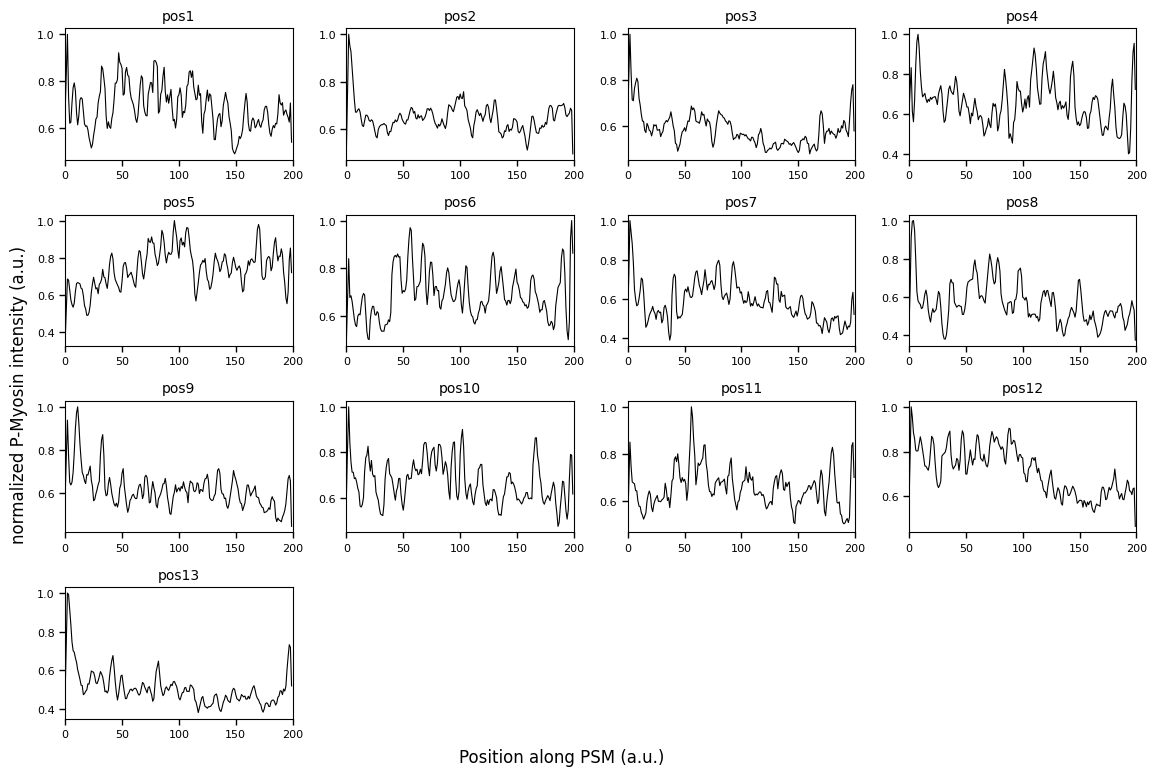

In [ ]:
# p-myosin in single plots

# Set up the figure for a panel of 4x3 subplots
fig, axes = plt.subplots(4, 4, figsize=(12, 8))  # Adjust figsize to fit the panel
axes = axes.flatten()  # Flatten the axes for easy iteration

# Plot each column in the panel
for i, column in enumerate(df.columns):
    ax = axes[i]
    ax.plot(df[column], color='black', linewidth=0.8)  # Black line, smaller width
    
    # Customize each subplot
    ax.set_xlim([0, 200])
    ax.set_xticks(range(0, 201, 50))
    ax.tick_params(width=1, length=4, labelsize=8)  # Smaller ticks and labels
    ax.set_title(column, fontsize=10)  # Add column name as title

# Remove any unused subplots
for j in range(len(df.columns), len(axes)):
    fig.delaxes(axes[j])

# Add global labels
fig.text(0.5, 0.04, 'Position along PSM (a.u.)', ha='center', fontsize=12)
fig.text(0.04, 0.5, 'normalized P-Myosin intensity (a.u.)', va='center', rotation='vertical', fontsize=12)

# Adjust layout
plt.tight_layout(rect=[0.05, 0.05, 1, 1])  # Make space for global labels

# Save the panel plot
directory = os.path.dirname(file_path)  # Get the directory of the CSV file
file_name = os.path.basename(file_path) 
save_path = os.path.join(directory, f'_plot_{current_date}_{file_name}.svg')  # Save panel plot

plt.savefig(save_path, bbox_inches='tight', dpi=300)
plt.show()


### mean and std

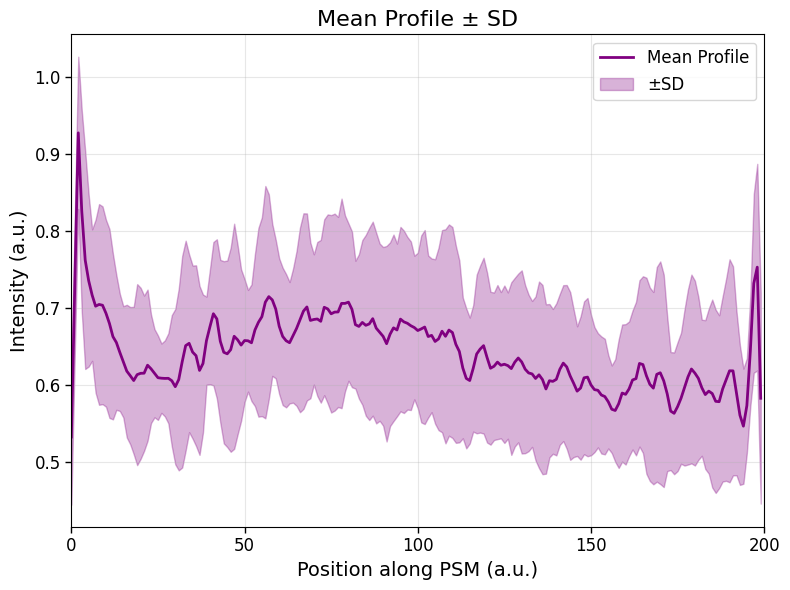

In [ ]:
# myosin-P mean and standard deviation
mean_profile = df.mean(axis=1)
std_profile = df.std(axis=1)

x = np.arange(len(mean_profile))

# Create a single plot
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(mean_profile, color='purple', linewidth=2, label='Mean Profile')
ax.fill_between(x, mean_profile - std_profile, mean_profile + std_profile, color='purple', alpha=0.3, label='±SD')

# Customize the plot appearance
ax.set_xlabel('Position along PSM (a.u.)', fontsize=14)
ax.set_ylabel('Intensity (a.u.)', fontsize=14)
ax.tick_params(width=1, length=4, labelsize=12)
ax.set_xlim([0, 200])
ax.set_xticks(range(0, 201, 50))
ax.legend(fontsize=12)
ax.set_title("Mean Profile ± SD", fontsize=16)
ax.grid(True, alpha=0.3)

# Adjust layout and save the plot
plt.tight_layout()
directory = os.path.dirname(file_path)  # Replace with your actual file path
current_date = datetime.now().strftime('%Y-%m-%d')
file_name = "mean+std"  # Replace with your actual file name (without extension)
save_path = os.path.join(directory, f'plot_{current_date}_{file_name}.svg')
plt.savefig(save_path, bbox_inches='tight', dpi=300)

# Display the plot
plt.show()

In [11]:
df

,pos1,pos2,pos3,pos4,pos5,pos6,pos7,pos8,pos9,pos10,pos11,pos12,pos13
0,0.673767,0.513685,0.637766,0.595976,0.356819,0.500741,0.497442,0.420572,0.582347,0.610015,0.492931,0.542938,0.489762
1,0.843479,0.757627,0.825915,0.721164,0.524915,0.674445,0.722652,0.629273,0.770368,0.822874,0.678879,0.767577,0.750502
2,1.000000,1.000000,1.000000,0.833049,0.685764,0.840780,1.000000,0.914274,0.938253,1.000000,0.850167,1.000000,1.000000
3,0.735414,0.952031,0.834028,0.615752,0.679623,0.678817,0.940638,0.996154,0.772584,0.844180,0.748411,0.953959,0.991490
4,0.622104,0.926605,0.714734,0.562415,0.625645,0.686074,0.882189,1.000000,0.650374,0.758612,0.681561,0.884611,0.914095
...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.659779,0.660207,0.623127,0.537626,0.552900,0.502416,0.457979,0.541463,0.607829,0.546634,0.531503,0.622753,0.602713
196,0.646914,0.666038,0.705899,0.768882,0.617609,0.578306,0.480932,0.580640,0.667418,0.684592,0.691947,0.608326,0.672226
197,0.627110,0.687068,0.758412,0.908728,0.788060,0.925219,0.594578,0.552095,0.681844,0.791292,0.834176,0.634229,0.733180
198,0.708226,0.677730,0.780616,0.954916,0.852117,1.000000,0.634364,0.531212,0.656940,0.787741,0.848146,0.637916,0.719632


# Intensity profiles from Thresholded Images 

Calculates mean intensities of pixels above 0 along the x-axis (rows) of a 2D image array (already straightened in Image J) and exports the result as a dataframe combining the single-axis arrays.

### image functions

In [ ]:
def positive_pixel_mean_intensities(image_array):
    """

    
    Parameters:
        image_array (numpy.ndarray): A 2D array representing the image.
    
    Returns:
        numpy.ndarray: A 1D array of mean intensities along the x-axis.
    """
    if not isinstance(image_array, np.ndarray):
        raise ValueError("Input must be a numpy array.")
    if len(image_array.shape) != 2:
        raise ValueError("Input must be a 2D array.")
    
    # Transpose the image so that columns become rows
    image_array = image_array.T  # Swap axes: x-axis and y-axis

    mean_intensities = []
    for row in image_array:  # Now iterate over the original x-axis (now rows)
        non_zero_pixels = row[row > 0]  # Select pixels with intensity above 0
        if len(non_zero_pixels) > 0:
            mean_intensity = np.mean(non_zero_pixels)
        else:
            mean_intensity = 0  # If no non-zero pixels, mean is set to 0
        mean_intensities.append(mean_intensity)
    
    return np.array(mean_intensities)

def process_images_in_folder(folder_path):
    """
    Processes all images in a folder to calculate mean intensities of non-zero
    pixels along the x-axis and creates a DataFrame with filenames as column headers.

    Parameters:
        folder_path (str): Path to the folder containing images.

    Returns:
        pandas.DataFrame: A DataFrame where each column corresponds to an image file,
                          and each row contains mean intensities along the x-axis.
    """
    if not os.path.isdir(folder_path):
        raise ValueError("The provided folder path is invalid.")
    
    # Initialize an empty dictionary to store results
    data = {}
    
    max_length = 0  # Variable to keep track of the maximum length of mean intensities
    
    # Loop through files in the folder
    for file_name in os.listdir(folder_path):
        file_path = os.path.join(folder_path, file_name)
        
        # Ensure the file is an image (you can add more extensions if needed)
        if file_name.lower().endswith(('.tif', '.tiff')):
            try:
                print(f"Processing image: {file_name}")  # Debugging line
                # Read the image as a 2D array (grayscale)
                image = imread(file_path, as_gray=True)  # Load image in grayscale
                
                # Ensure the image is a NumPy array
                if not isinstance(image, np.ndarray):
                    raise ValueError(f"File {file_name} is not a valid image.")
                
                # Calculate mean intensities using the previously defined function
                mean_intensities = positive_pixel_mean_intensities(image)
                
                # Update the maximum length (the longest mean intensities array)
                max_length = max(max_length, len(mean_intensities))
                
                # Add the results to the dictionary
                data[file_name] = mean_intensities
            
            except Exception as e:
                print(f"Error processing file {file_name}: {e}")
    
    # If no data was added to the dictionary, print a message
    if not data:
        print("No images were processed or no valid images found.")
    
    # Pad all arrays to ensure they have the same length
    for key in data:
        current_length = len(data[key])
        if current_length < max_length:
            # Pad with NaN or zero
            padding = [np.nan] * (max_length - current_length)
            data[key] = np.concatenate([data[key], padding])
    
    # Convert the dictionary into a DataFrame
    if data:
        df = pd.DataFrame(data)
        return df
    else:
        return pd.DataFrame()  # Return empty DataFrame if no valid images were processed

### form the dataframe

In [39]:
df_thr = process_images_in_folder('/Volumes/upoates/common/Feyza/raw_data_BIOP/241206-pmyosin-yap_loopingbg-good/pmyosin-midPSM-snaps/straightened')

df_resized = resize_columns(df_thr,200);
df_smooth = apply_moving_average(df_resized, 4);
df_norm = normalize_columns(df_smooth)
df_thr = df_norm

df_thr

Processing image: pos7-straightened.tif
Mean intensities for pos7-straightened.tif: [4588.884  4828.379  5447.2524 4481.478  3521.728  3209.8948 3613.8784
 3504.0913 3529.839  4276.5513 4834.6787 4310.9    3120.7595 3536.004
 3758.5732 4275.817  3613.7573 4408.6416 4275.8525 4765.4604 4829.968
 3818.5889 3240.7664 3826.955  3949.2578 4036.0032 3404.563  2825.8203
 2772.6365 2800.0256 3494.5203 3085.2656 3259.7124 2772.3442 2924.6963
 3245.219  2897.8564 2800.7178 3276.367  3487.7263 3267.6436 2944.013
 2686.1711 2508.887  2581.9438 2830.325  2920.05   3843.2964 3730.146
 2733.0671 2715.291  2842.4058 2940.5999 3233.7014 3612.4514 3409.3906
 3712.0532 4032.8264 3146.117  2713.0488 2754.4956 2429.957  2594.4275
 3211.7517 3762.2996 4010.157  4257.3423 3792.1035 3226.0042 2925.8386
 2528.42   2460.4697 2523.6252 3139.195  3625.1921 3278.837  3147.3203
 2332.2332 2205.0068 1937.9213 2166.464  2493.6165 2580.7432 2350.3657
 2113.8804 2087.9426 2463.736  2719.1462 2766.2812 2717.2852 2580.91

,pos7-straightened.tif,pos1-straightened.tif,pos4-straightened.tif,pos5-straightened.tif,pos3-straightened.tif,pos6-straightened.tif,pos2-straightened.tif
0,0.455511,0.613172,0.369447,0.406710,0.491658,0.580954,0.544771
1,0.721887,0.811128,0.522708,0.633507,0.697697,0.795716,0.776063
2,0.950571,1.000000,0.638047,0.783020,0.958656,1.000000,1.000000
3,0.961380,0.917916,0.568283,0.739319,0.953039,0.956289,0.915540
4,1.000000,0.944580,0.505475,0.699176,0.883720,0.910665,0.845015
...,...,...,...,...,...,...,...
195,0.608434,0.526443,0.638814,0.610694,0.569721,0.499175,0.572581
196,0.631049,0.579991,0.896151,0.617167,0.607431,0.552422,0.512251
197,0.771132,0.678279,0.910870,0.565324,0.738787,0.631281,0.500157
198,0.754506,0.719181,0.981858,0.582973,0.756797,0.662499,0.558087


### single plots

NameError: name '_thr' is not defined

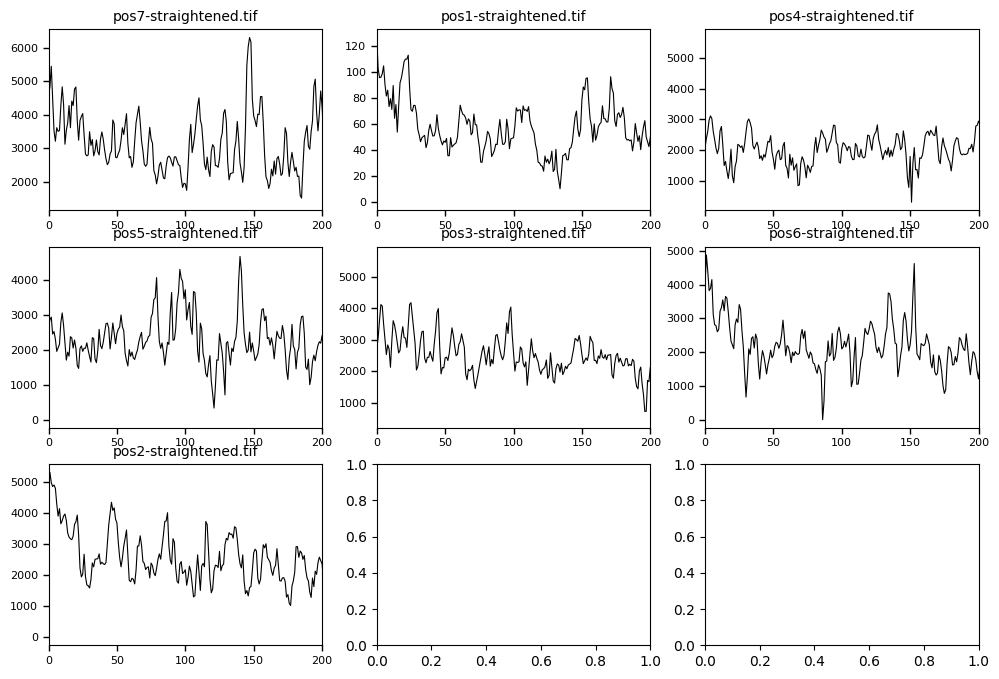

In [ ]:
# Set up the figure for a panel of 4x3 subplots
fig, axes = plt.subplots(3, 3, figsize=(12, 8))  # Adjust figsize to fit the panel
axes = axes.flatten()  # Flatten the axes for easy iteration

# Plot each column in the panel
for i, column in enumerate(df_thr.columns):
    ax = axes[i]
    ax.plot(df_thr[column], color='black', linewidth=0.8)  # Black line, smaller width
    
    # Customize each subplot
    ax.set_xlim([0, 200])
    ax.set_xticks(range(0, 201, 50))
    ax.tick_params(width=1, length=4, labelsize=8)  # Smaller ticks and labels
    ax.set_title(column, fontsize=10)  # Add column name as title

# Remove any unused subplots
for j in range(len(_thr.columns), len(axes)):
    fig.delaxes(axes[j])

# Add global labels
fig.text(0.5, 0.04, 'Position along PSM (a.u.)', ha='center', fontsize=12)
fig.text(0.04, 0.5, 'normalized P-Myosin intensity (a.u.)', va='center', rotation='vertical', fontsize=12)

# Adjust layout
plt.tight_layout(rect=[0.05, 0.05, 1, 1])  # Make space for global labels

# Save the panel plot
directory = os.path.dirname(file_path)  # Get the directory of the CSV file
file_name = os.path.basename(file_path) 
save_path = os.path.join(directory, f'_plot_{current_date}_{file_name}.svg')  # Save panel plot

#plt.savefig(save_path, bbox_inches='tight', dpi=300)
plt.show()
